## Sentiment Analysis in Python
using two different techniques:

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
Roberta Pretrained Model from Huggingface

### Read in data in basics NLTK

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [6]:
# read in data
df = pd.read_csv(r'C:\Users\User\Documents\kyouth\portfolio\GoogleReview_data_cleaned.csv\GoogleReview_data_cleaned.csv')
print(df.shape)
print(df.dtypes)


(222020, 5)
Author         object
Rating        float64
Review         object
Restaurant     object
Location       object
dtype: object


In [7]:
df = df.head(500)
print(df.shape)
df['Rating'] = df['Rating'].astype(int)
df

(500, 5)


,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh
...,...,...,...,...,...
495,Dhinesh Sasidaran,4,Food was excellent,Tandoor Grill,Ipoh
496,Mohd Asri Abd Rashid,4,Ok,Tandoor Grill,Ipoh
497,Rajashekhar Pendyala,5,Love it,Tandoor Grill,Ipoh
498,Renukka Thulasiraman,4,Good,Tandoor Grill,Ipoh


In [8]:
print("missing value")
print(df.isnull().sum())
print(" ")
print("duplicate value")
df.duplicated().sum()

missing value
Author        0
Rating        0
Review        0
Restaurant    0
Location      0
dtype: int64
 
duplicate value


0

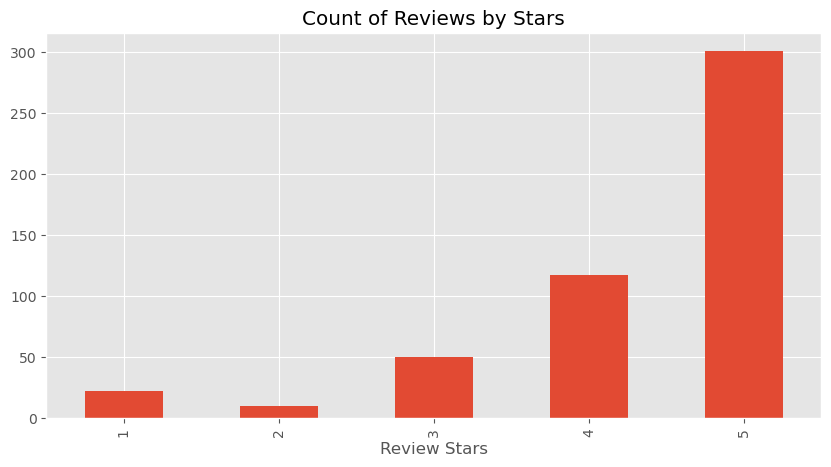

In [9]:
# Quick EDA
rating_graph= df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
rating_graph.set_xlabel('Review Stars')
plt.show()


In [10]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [11]:
constraints=['#B34D22','#EBE00C','#1FEB0C','#0C92EB','#EB0CD5']
def categorical_variable_summary (df, column_name):
    fig= make_subplots(rows= 1, cols=2,
                        subplot_titles=('Countplot','Percentage'),
                        specs=[[{"type": "xy"},{'type':'domain'}]])
    
    fig.add_trace(go.Bar(y= df[column_name].value_counts().values.tolist(),
                        x= [str(i) for i in df[column_name].value_counts().index],
                        text= df[column_name].value_counts().values.tolist(),
                        textfont= dict(size=14),
                        name= column_name,
                        textposition= 'auto',
                        showlegend = False,
                        marker= dict(color= constraints, line=dict(color='#DBE6EC', width=1))),
                        row= 1, col=1)
    
    fig.add_trace(go.Pie(labels = df[column_name].value_counts().keys(),
                        values= df[column_name].value_counts().values,
                        textfont=dict(size=18),
                        textposition= 'auto',
                        showlegend= False,
                        name= column_name,
                        marker= dict(colors= constraints)),
                        row=1, col= 2)

    fig.update_layout(title={'text':column_name,
                        'y': 0.9,
                        'x': 0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                        template= 'plotly_white')

    iplot(fig)

In [12]:
categorical_variable_summary(df,'Rating')

In [13]:
# Basic NLTK

review_example= df.Review[172]
print(review_example)

Very nicely cooked Indian dishes,  especially the mutton curry👍


In [14]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
sentences = sent_tokenize(review_example)
sentences

['Very nicely cooked Indian dishes,  especially the mutton curry👍']

In [16]:
# Punctuation removal
import re

# Remove punctuation characters
review_example = re.sub(r"[^a-zA-Z0-9]", " ", review_example) 
review_example

'Very nicely cooked Indian dishes   especially the mutton curry '

In [17]:
tokens = nltk.word_tokenize(review_example)
tokens[:10]

['Very',
 'nicely',
 'cooked',
 'Indian',
 'dishes',
 'especially',
 'the',
 'mutton',
 'curry']

In [18]:
#removal of stop words
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
words= [w for w in tokens if w not in stopwords.words("english")]
print(words)

['Very', 'nicely', 'cooked', 'Indian', 'dishes', 'especially', 'mutton', 'curry']


In [20]:
#Stemming and lemmatization
nltk.download('wordnet') # download for lemmatization
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
# Stemming
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['veri', 'nice', 'cook', 'indian', 'dish', 'especi', 'mutton', 'curri']


In [22]:
# Lemmatize
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmatized = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmatized)

['Very', 'nicely', 'cooked', 'Indian', 'dish', 'especially', 'mutton', 'curry']


In [23]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [24]:
#speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:7]

[('Very', 'RB'),
 ('nicely', 'RB'),
 ('cooked', 'JJ'),
 ('Indian', 'JJ'),
 ('dishes', 'NNS'),
 ('especially', 'RB'),
 ('the', 'DT')]

In [25]:
from nltk import ne_chunk
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [26]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Very/RB
  nicely/RB
  cooked/JJ
  (GPE Indian/JJ)
  dishes/NNS
  especially/RB
  the/DT
  mutton/NN
  curry/NN)


### VADER sentiment scoring

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(review_example)

{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4927}

In [29]:
# Run the polarity score on the entire dataset
res = {}

for i, row in df.iterrows():
    text = row['Review']
    myid = i  # Use the row index as a unique identifier
    res[myid] = sia.polarity_scores(text)


In [30]:
vaders=pd.DataFrame(res).T
vaders = vaders.merge(df, how='left', left_index=True, right_index=True)

In [31]:
vaders.head()

,neg,neu,pos,compound,Author,Rating,Review,Restaurant,Location
0,0.000,0.578,0.422,0.9313,Jia Pin Lee,4,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,0.000,0.857,0.143,0.6542,Chui Yi Lum,2,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,0.041,0.674,0.285,0.9283,liezel wong,1,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,0.265,0.735,0.000,-0.8977,Nazri Nor,1,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,0.000,0.797,0.203,0.6249,Fakru Imran's Channel,5,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


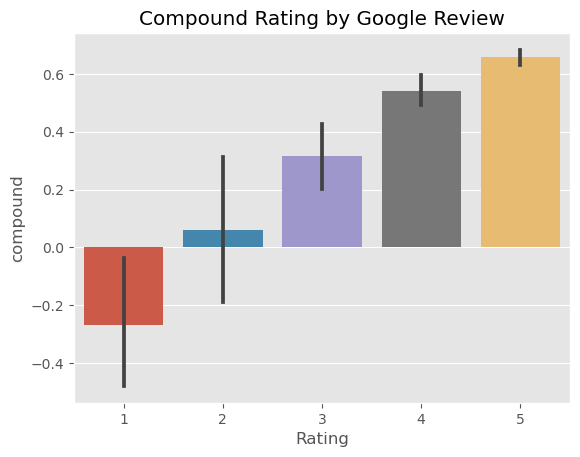

In [32]:
#Plot VADER result
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Rating by Google Review')
plt.show()

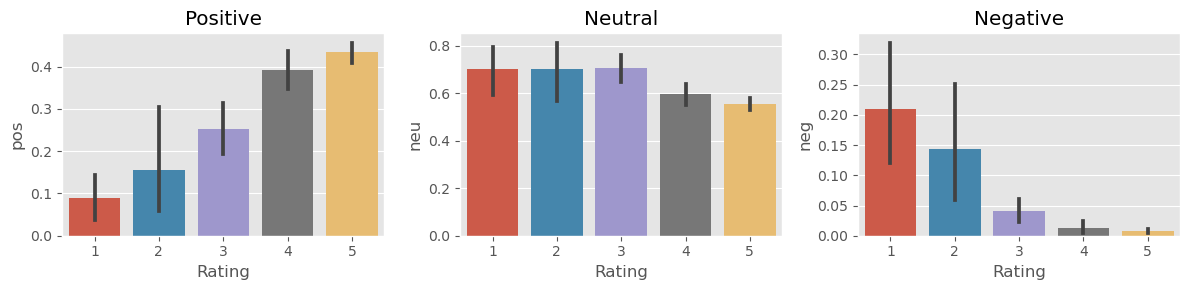

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model
Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [34]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
# VADER results on example
print(review_example)
sia.polarity_scores(review_example)


Very nicely cooked Indian dishes   especially the mutton curry 


{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4927}

In [37]:
# Run for Roberta Model
encoded_text = tokenizer(review_example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0024497977, 'roberta_neu': 0.054430403, 'roberta_pos': 0.94311976}


In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [39]:
res = {}
for i, row in df.iterrows():
    try:
        text = row['Review']
        myid = i # Use the row index as a unique identifier
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [43]:
results_df = pd.DataFrame(res).T
results_df = results_df.merge(df, how='left', left_index=True, right_index=True)
results_df.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Author,Rating,Review,Restaurant,Location
0,0.000,0.578,0.422,0.9313,0.001410,0.009635,0.988955,Jia Pin Lee,4,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,0.000,0.857,0.143,0.6542,0.083447,0.385692,0.530861,Chui Yi Lum,2,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,0.041,0.674,0.285,0.9283,0.688108,0.244473,0.067419,liezel wong,1,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,0.265,0.735,0.000,-0.8977,0.972437,0.024547,0.003016,Nazri Nor,1,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,0.000,0.797,0.203,0.6249,0.197806,0.606572,0.195622,Fakru Imran's Channel,5,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


### Combine score between vader and roberta


In [45]:
results_df.columns

Index(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'Author', 'Rating', 'Review',
       'Restaurant', 'Location'],
      dtype='object')

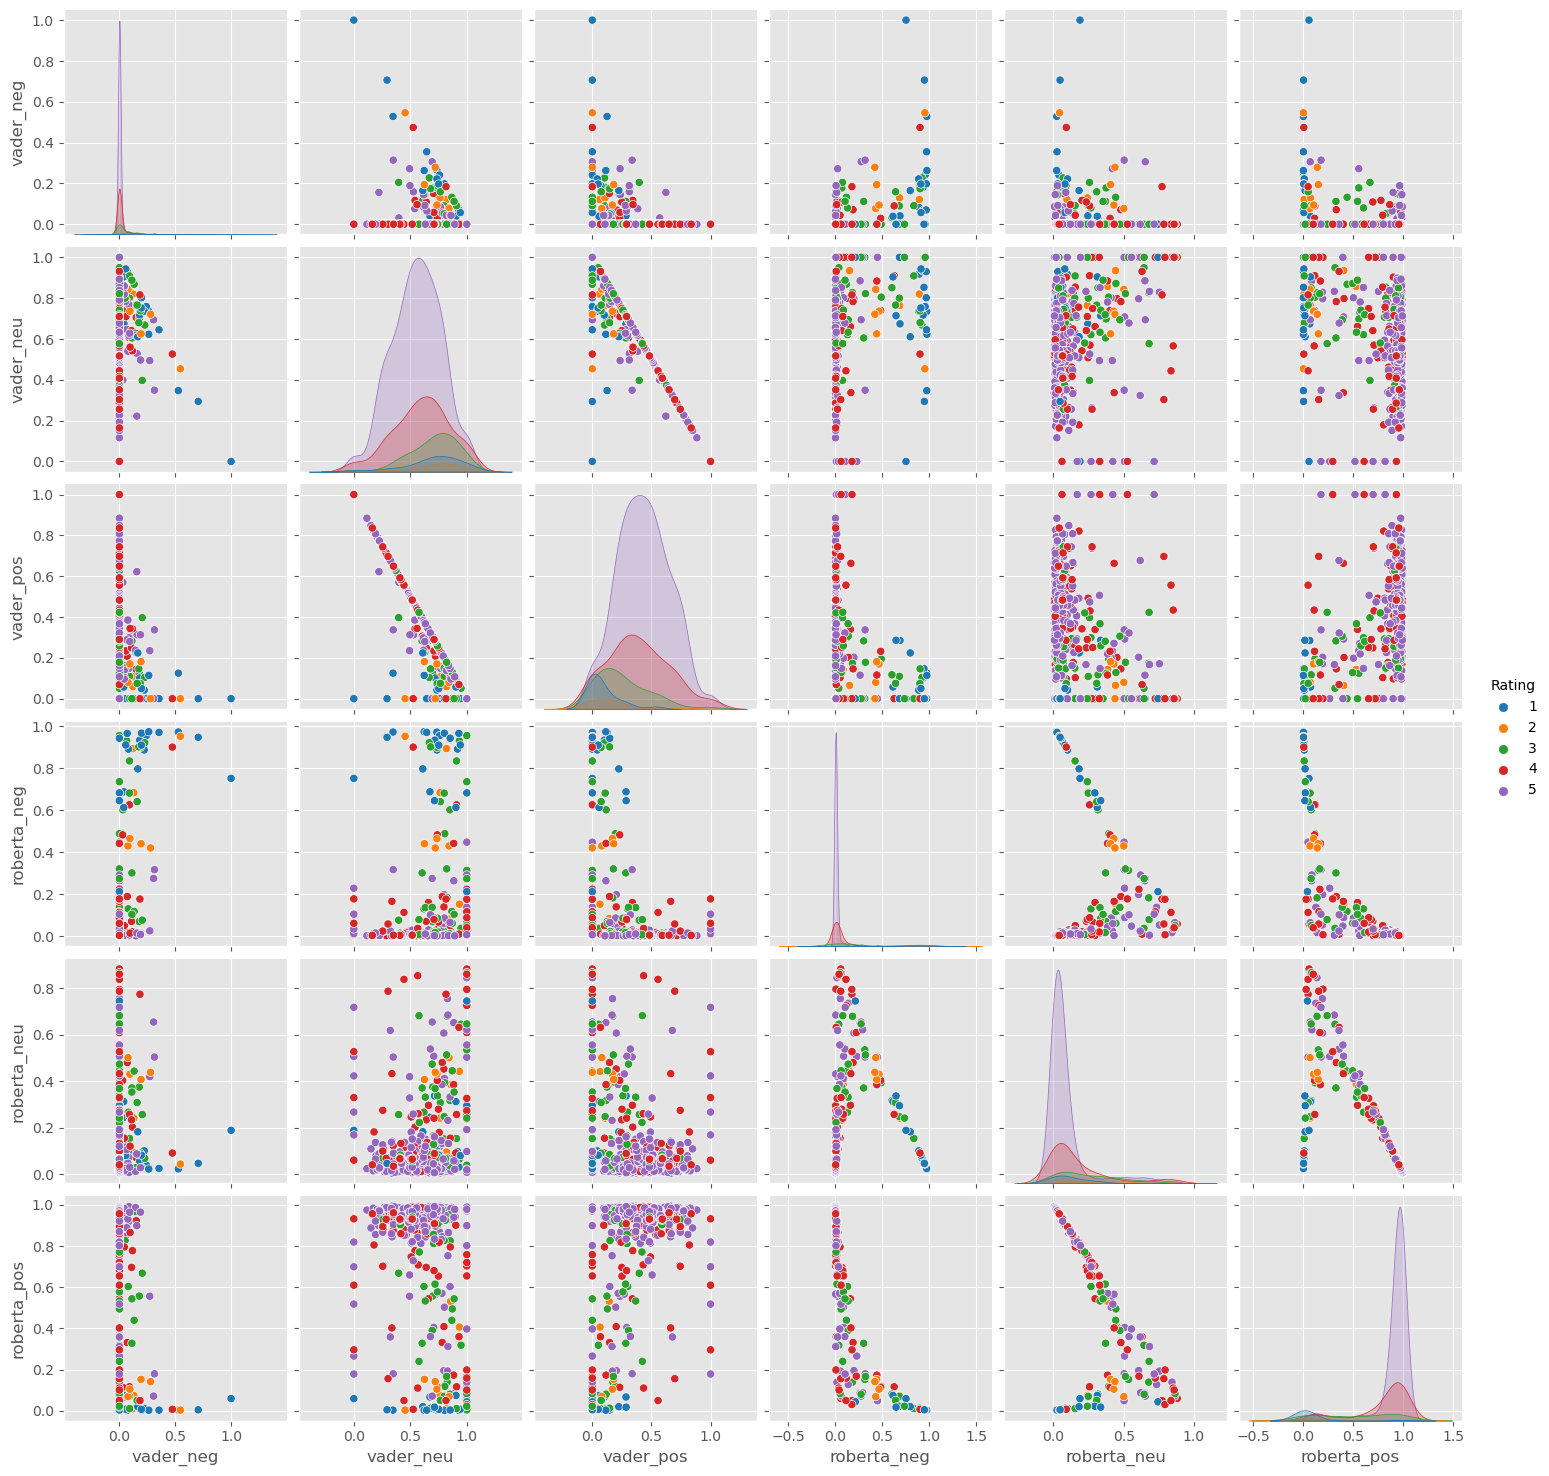

In [46]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()